Importing Required Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Loading the Datasets

In [46]:
matches_path = "data/matches.csv"
deliveries_path = "data/deliveries.csv"

matches_df = pd.read_csv(matches_path)
deliveries_df = pd.read_csv(deliveries_path)

Checking for missing values

In [47]:
print("Dimensionality of Matches Dataset:")
print(matches_df.shape)
print("Missing Values in Matches Dataset:")
print(matches_df.isnull().sum())

print("\nDimensionality of Deliveries Dataset:")
print(deliveries_df.shape)
print("Missing Values in Deliveries Dataset:")
print(deliveries_df.isnull().sum())

Dimensionality of Matches Dataset:
(1095, 20)
Missing Values in Matches Dataset:
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Dimensionality of Deliveries Dataset:
(260920, 17)
Missing Values in Deliveries Dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type 

Handling missing values in the dataset

In [48]:
# For simplicity, let's fill missing values with a placeholder (e.g., 'Unknown' for categorical data, 0 for numerical data)
matches_df['city'].fillna('Unknown', inplace=True)
matches_df['winner'].fillna('No Result', inplace=True)
matches_df['method'].fillna('None', inplace=True)
matches_df['umpire1'].fillna('Unknown', inplace=True)
matches_df['umpire2'].fillna('Unknown', inplace=True)
matches_df['result_margin'].fillna(0, inplace=True)
matches_df['player_of_match'].fillna('None', inplace=True)
matches_df['target_runs'].fillna(0, inplace=True)
matches_df['target_overs'].fillna(0, inplace=True)

deliveries_df['player_dismissed'].fillna('None', inplace=True)
deliveries_df['dismissal_kind'].fillna('None', inplace=True)
deliveries_df['fielder'].fillna('None', inplace=True)
deliveries_df['extras_type'].fillna('None', inplace=True)

Verifing that there are no missing values left

In [49]:
print("Missing Values in Matches Dataset after handling:")
print(matches_df.isnull().sum())

print("\nMissing Values in Deliveries Dataset after handling:")
print(deliveries_df.isnull().sum())

Missing Values in Matches Dataset after handling:
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

Missing Values in Deliveries Dataset after handling:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


Printing unique team names in the dataset

In [50]:
print("Unique team names in matches dataset (team1):")
print(matches_df['team1'].unique())
print("\nUnique team names in matches dataset (team2):")
print(matches_df['team2'].unique())
print("\nUnique team names in matches dataset (winner):")
print(matches_df['winner'].unique())
print("\nUnique team names in matches dataset (toss_winner):")
print(matches_df['toss_winner'].unique())

print("\nUnique team names in deliveries dataset (batting_team):")
print(deliveries_df['batting_team'].unique())
print("\nUnique team names in deliveries dataset (bowling_team):")
print(deliveries_df['bowling_team'].unique())

Unique team names in matches dataset (team1):
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']

Unique team names in matches dataset (team2):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']

Unique team names in matches dataset (winner):
['Kolkata Knight Riders' 'Chennai Super Kings' 'De

Mapping old team names to new team names

In [51]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Gujarat Lions': 'Gujarat Titans',
}

# Apply the mapping to the matches dataset
matches_df['team1'] = matches_df['team1'].replace(team_name_mapping)
matches_df['team2'] = matches_df['team2'].replace(team_name_mapping)
matches_df['winner'] = matches_df['winner'].replace(team_name_mapping)
matches_df['toss_winner'] = matches_df['toss_winner'].replace(team_name_mapping)

# Apply the mapping to the deliveries dataset
deliveries_df['batting_team'] = deliveries_df['batting_team'].replace(team_name_mapping)
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].replace(team_name_mapping)

# Verify the standardization
print("Unique team names in matches dataset (team1):")
print(matches_df['team1'].unique())
print("\nUnique team names in matches dataset (team2):")
print(matches_df['team2'].unique())
print("\nUnique team names in matches dataset (winner):")
print(matches_df['winner'].unique())
print("\nUnique team names in matches dataset (toss_winner):")
print(matches_df['toss_winner'].unique())

print("\nUnique team names in deliveries dataset (batting_team):")
print(deliveries_df['batting_team'].unique())
print("\nUnique team names in deliveries dataset (bowling_team):")
print(deliveries_df['bowling_team'].unique())

Unique team names in matches dataset (team1):
['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Titans' 'Rising Pune Supergiants'
 'Lucknow Super Giants']

Unique team names in matches dataset (team2):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Rising Pune Supergiants' 'Gujarat Titans' 'Lucknow Super Giants']

Unique team names in matches dataset (winner):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'No Result' 'Rising Pune Supergiants'
 'Gujarat Titans' 'Lucknow Super Giants']

Unique team name

Removing teams that are not playing IPL 2025

In [52]:
active_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans', 'Kolkata Knight Riders',
    'Lucknow Super Giants', 'Mumbai Indians', 'Punjab Kings', 'Rajasthan Royals',
    'Royal Challengers Bengaluru', 'Sunrisers Hyderabad'
]

# Filter the matches dataset
matches_df = matches_df[
    matches_df['team1'].isin(active_teams) &
    matches_df['team2'].isin(active_teams) &
    matches_df['winner'].isin(active_teams) &
    matches_df['toss_winner'].isin(active_teams)
]

# Filter the deliveries dataset
deliveries_df = deliveries_df[
    deliveries_df['batting_team'].isin(active_teams) &
    deliveries_df['bowling_team'].isin(active_teams)
]

# Verify the filtering
print("Unique team names in matches dataset (team1):")
print(matches_df['team1'].unique())
print("\nUnique team names in matches dataset (team2):")
print(matches_df['team2'].unique())
print("\nUnique team names in matches dataset (winner):")
print(matches_df['winner'].unique())
print("\nUnique team names in matches dataset (toss_winner):")
print(matches_df['toss_winner'].unique())

print("\nUnique team names in deliveries dataset (batting_team):")
print(deliveries_df['batting_team'].unique())
print("\nUnique team names in deliveries dataset (bowling_team):")
print(deliveries_df['bowling_team'].unique())

Unique team names in matches dataset (team1):
['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants']

Unique team names in matches dataset (team2):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Gujarat Titans' 'Lucknow Super Giants']

Unique team names in matches dataset (winner):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Titans'
 'Lucknow Super Giants']

Unique team names in matches dataset (toss_winner):
['Royal Challengers Bengaluru' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Guja

Plotting Matches Played and Winning Percentages for each team

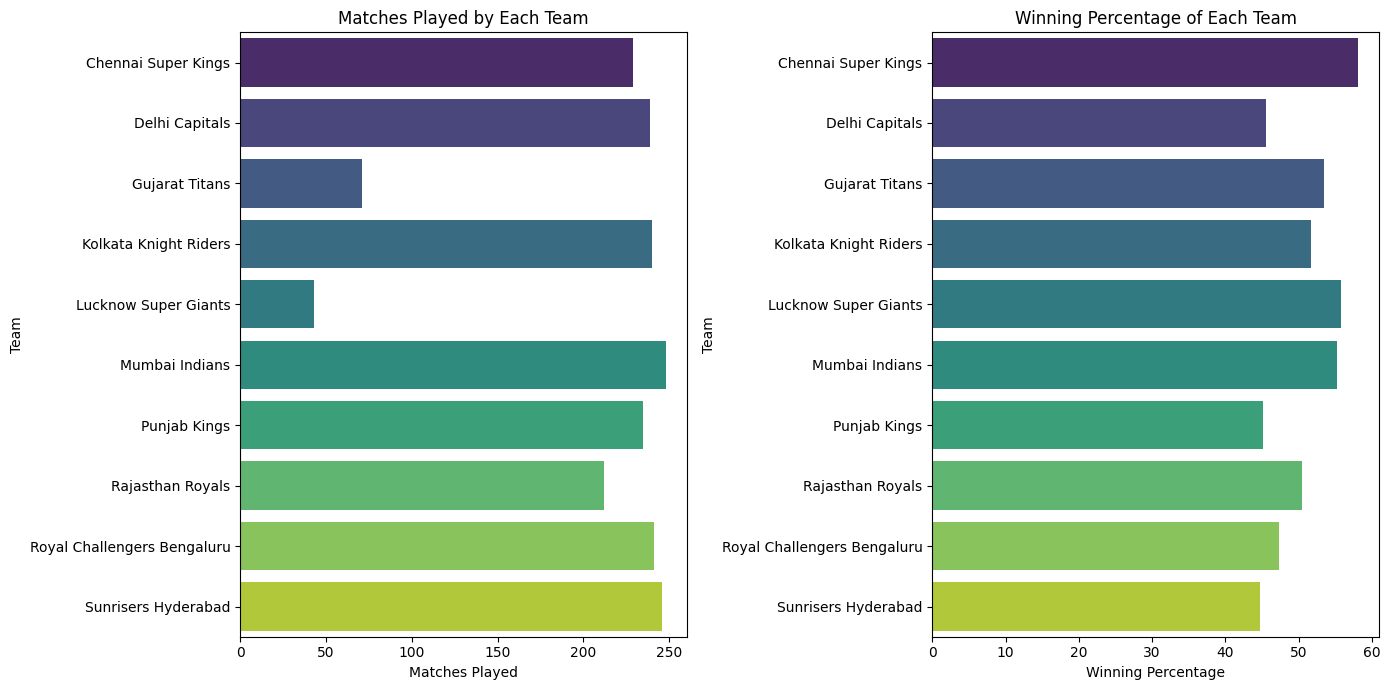

In [53]:
matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
matches_won = matches_df['winner'].value_counts()
winning_percentage = (matches_won / matches_played) * 100

team_performance_df = pd.DataFrame({
    'Matches Played': matches_played,
    'Matches Won': matches_won,
    'Winning Percentage': winning_percentage
}).reset_index().rename(columns={'index': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Matches Played', y='Team', data=team_performance_df, palette='viridis')
plt.title('Matches Played by Each Team')
plt.xlabel('Matches Played')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Winning Percentage', y='Team', data=team_performance_df, palette='viridis')
plt.title('Winning Percentage of Each Team')
plt.xlabel('Winning Percentage')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

Plotting Run Rate and Economy Rate for each team

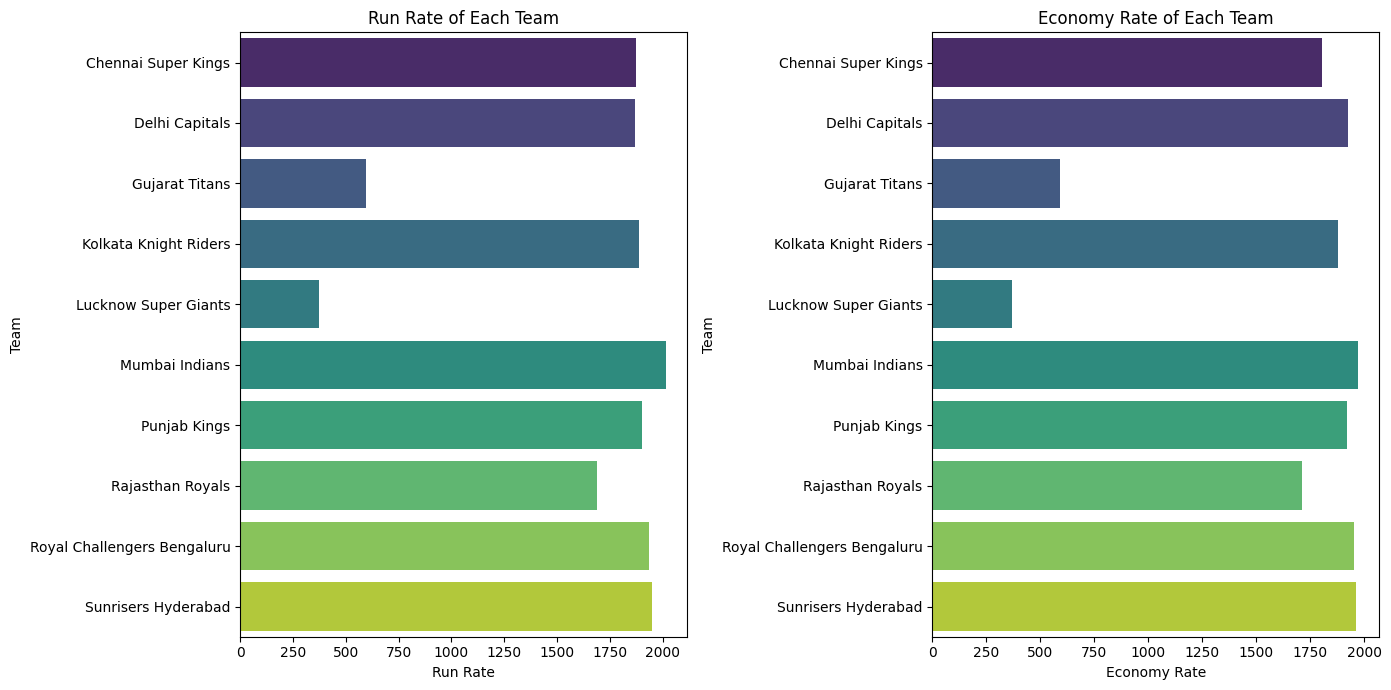

In [54]:
team_runs = deliveries_df.groupby('batting_team')['total_runs'].sum()
team_overs = deliveries_df.groupby('batting_team')['over'].nunique()
team_run_rate = team_runs / team_overs

team_bowling_runs = deliveries_df.groupby('bowling_team')['total_runs'].sum()
team_bowling_overs = deliveries_df.groupby('bowling_team')['over'].nunique()
team_economy_rate = team_bowling_runs / team_bowling_overs

team_rate_df = pd.DataFrame({
    'Run Rate': team_run_rate,
    'Economy Rate': team_economy_rate
}).reset_index().rename(columns={'index': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Run Rate', y='Team', data=team_rate_df, palette='viridis')
plt.title('Run Rate of Each Team')
plt.xlabel('Run Rate')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Economy Rate', y='Team', data=team_rate_df, palette='viridis')
plt.title('Economy Rate of Each Team')
plt.xlabel('Economy Rate')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

Plotting Highest and Lowest Scores of each team

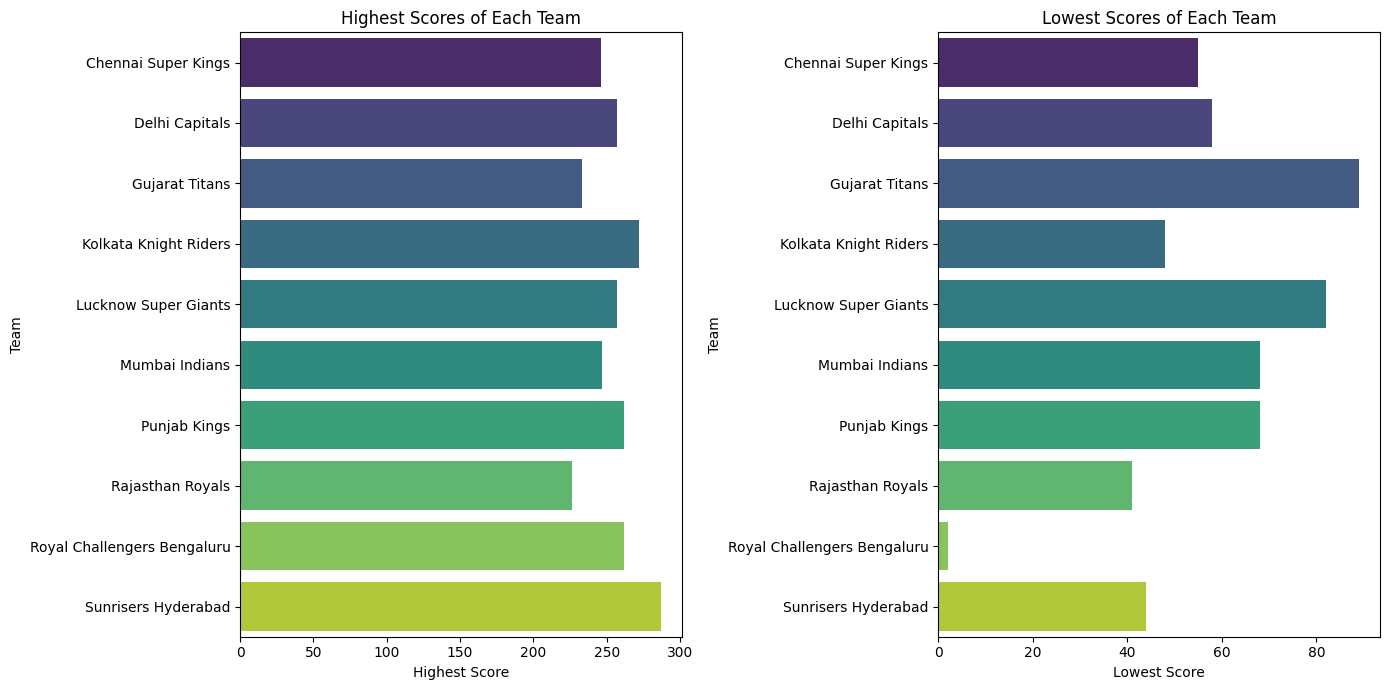

In [55]:
highest_scores = deliveries_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = highest_scores.groupby('batting_team')['total_runs'].max().reset_index().rename(columns={'total_runs': 'Highest Score'})

lowest_scores = deliveries_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
lowest_scores = lowest_scores.groupby('batting_team')['total_runs'].min().reset_index().rename(columns={'total_runs': 'Lowest Score'})

# Merge highest and lowest scores into a single DataFrame
team_scores_df = pd.merge(highest_scores, lowest_scores, on='batting_team').rename(columns={'batting_team': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Highest Score', y='Team', data=team_scores_df, palette='viridis')
plt.title('Highest Scores of Each Team')
plt.xlabel('Highest Score')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Lowest Score', y='Team', data=team_scores_df, palette='viridis')
plt.title('Lowest Scores of Each Team')
plt.xlabel('Lowest Score')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

Plotting Total 4s and 6s for each team

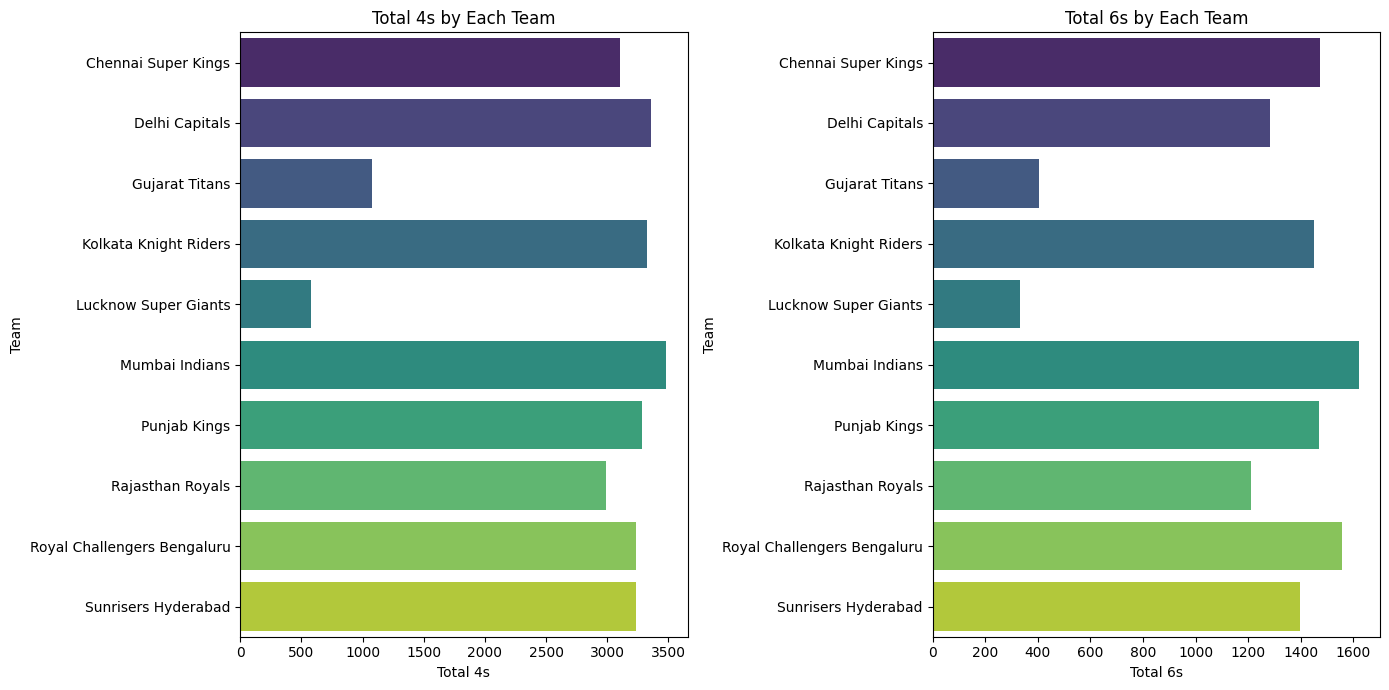

In [56]:
total_fours = deliveries_df[deliveries_df['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count().reset_index().rename(columns={'batsman_runs': 'Total 4s'})
total_sixes = deliveries_df[deliveries_df['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count().reset_index().rename(columns={'batsman_runs': 'Total 6s'})

# Merge total 4s and 6s into a single DataFrame
team_boundaries_df = pd.merge(total_fours, total_sixes, on='batting_team').rename(columns={'batting_team': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Total 4s', y='Team', data=team_boundaries_df, palette='viridis')
plt.title('Total 4s by Each Team')
plt.xlabel('Total 4s')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Total 6s', y='Team', data=team_boundaries_df, palette='viridis')
plt.title('Total 6s by Each Team')
plt.xlabel('Total 6s')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

Plotting Average Powerplay and Death Overs Score for each team

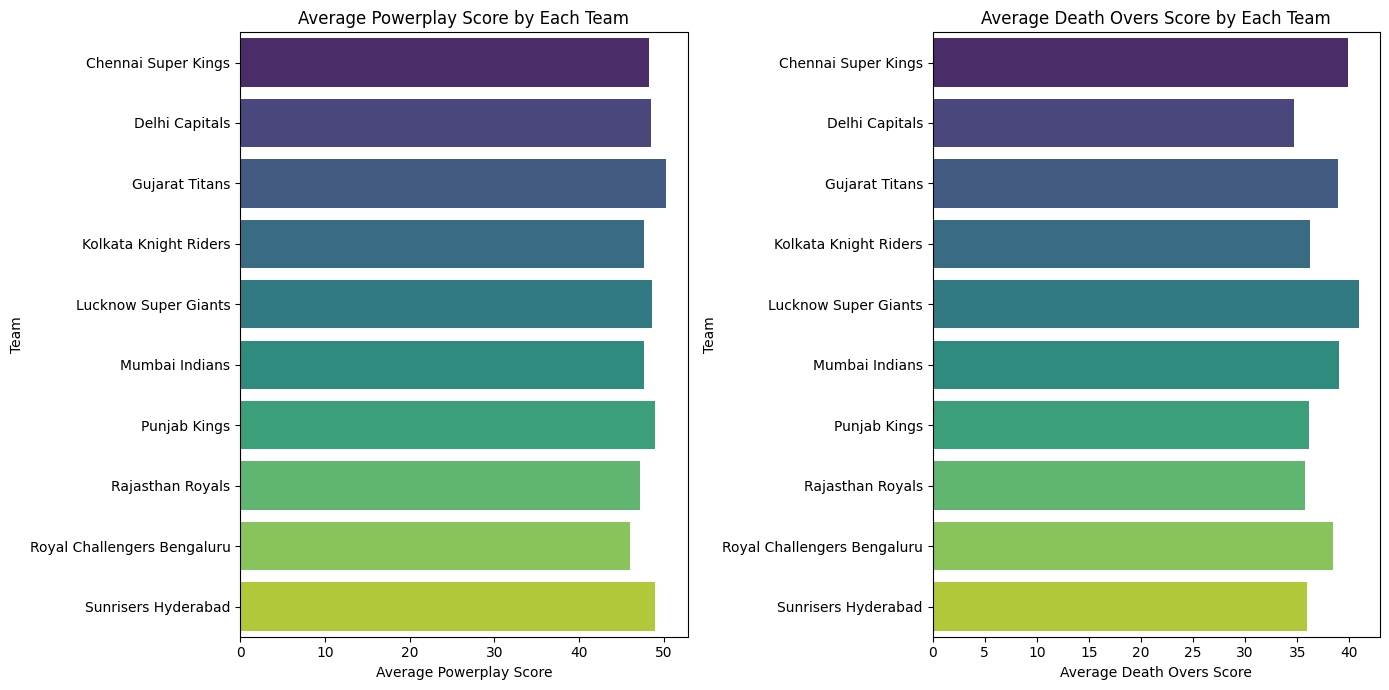

In [57]:
powerplay_scores = deliveries_df[(deliveries_df['over'] >= 1) & (deliveries_df['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

average_powerplay_scores = powerplay_scores.groupby('batting_team')['total_runs'].mean().reset_index().rename(columns={'total_runs': 'Average Powerplay Score'})
average_death_overs_scores = death_overs_scores.groupby('batting_team')['total_runs'].mean().reset_index().rename(columns={'total_runs': 'Average Death Overs Score'})

# Merge average powerplay and death overs scores into a single DataFrame
team_overs_scores_df = pd.merge(average_powerplay_scores, average_death_overs_scores, on='batting_team').rename(columns={'batting_team': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Average Powerplay Score', y='Team', data=team_overs_scores_df, palette='viridis')
plt.title('Average Powerplay Score by Each Team')
plt.xlabel('Average Powerplay Score')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Average Death Overs Score', y='Team', data=team_overs_scores_df, palette='viridis')
plt.title('Average Death Overs Score by Each Team')
plt.xlabel('Average Death Overs Score')
plt.ylabel('Team')


plt.tight_layout()
plt.show()